In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('fivethirtyeight')
from datetime import datetime as dt

In [3]:
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

# first, lets explore sheet CustomerDemographic

In [4]:
df=pd.read_excel(xls,'CustomerDemographic',parse_dates=['Unnamed: 5'])

In [5]:
df.head(3)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16


In [6]:
df.rename(columns={'Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ': 'customer_id','Unnamed: 1':'first_name','Unnamed: 2':'last_name',"Unnamed: 3":"gender",
                   "Unnamed: 4":"3y_bike_purchases",
                   "Unnamed: 5":"DOB",
                   "Unnamed: 6":"JT",
                  "Unnamed: 7":"Category",
                   "Unnamed: 8":"wealth_segement",
                   "Unnamed: 9":"D_Indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                   "Unnamed: 12":"tencure"},inplace=True)

In [7]:
df.head(3)

,customer_id,first_name,last_name,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,default,owns_car,tencure
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16


In [8]:
df['DOB'].dtype

dtype('O')

In [9]:
df=df[1:]

In [10]:
df.head(3)

,customer_id,first_name,last_name,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,default,owns_car,tencure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15


In [11]:
index_col=df['customer_id']
df.index=index_col

In [12]:
df.head()

,customer_id,first_name,last_name,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,default,owns_car,tencure
customer_id,,,,,,,,,,,,,
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [13]:
df=df.rename(columns={'customer_id':'sr'})

In [14]:
df=df.drop(['sr'],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   first_name         4000 non-null   object
 1   last_name          3875 non-null   object
 2   gender             4000 non-null   object
 3   3y_bike_purchases  4000 non-null   object
 4   DOB                3913 non-null   object
 5   JT                 3494 non-null   object
 6   Category           3344 non-null   object
 7   wealth_segement    4000 non-null   object
 8   D_Indicator        4000 non-null   object
 9   default            3698 non-null   object
 10  owns_car           4000 non-null   object
 11  tencure            3913 non-null   object
dtypes: object(12)
memory usage: 406.2+ KB


### checking for missing values first

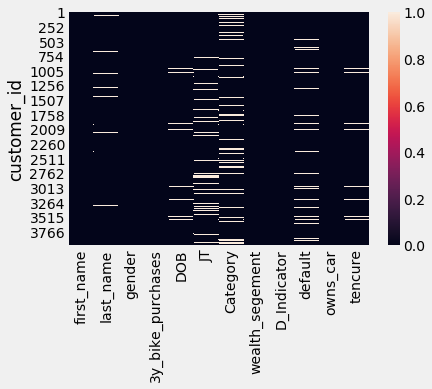

In [16]:
sns.heatmap(df.isna())

In [17]:
df.isna().sum()

first_name             0
last_name            125
gender                 0
3y_bike_purchases      0
DOB                   87
JT                   506
Category             656
wealth_segement        0
D_Indicator            0
default              302
owns_car               0
tencure               87
dtype: int64

In [18]:
col=['gender','JT','Category','wealth_segement','D_Indicator','default','owns_car']
for i in col:
    print(i)
    print('-----------')
    print(df[i].unique())
    
    print('-----------')

gender
-----------
['F' 'Male' 'Female' 'U' 'Femal' 'M']
-----------
JT
-----------
['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurse' 'Biostatistician II' 'Computer Systems Analyst II'
 'Software Test Engineer II' 'Paralegal' 'VP Sales'
 'Chief Design Engineer' 'Office

### column named default has data which seems to be of no use at all, so better drop it

In [19]:
df=df.drop(['default'],axis=1)

### column wealth_segment has only 3 categories of people named ['Mass Customer' 'Affluent Customer' 'High Net Worth']

### column gender contains values as ['F' 'Male' 'Female' 'U' 'Femal' 'M'] , we need to take care f thse column as well

In [20]:
df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [21]:
df['gender'].replace('Femal','F')

customer_id
1            F
2         Male
3         Male
4         Male
5       Female
         ...  
3996    Female
3997    Female
3998         U
3999      Male
4000      Male
Name: gender, Length: 4000, dtype: object

In [22]:
df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [23]:
df['gender']=df['gender'].replace('Femal','F')

In [24]:
df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'M'], dtype=object)

In [25]:
df['gender']=df['gender'].replace('Female','F')
df['gender']=df['gender'].replace('Male','M')

In [26]:
df['gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [27]:
df['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [28]:
df['D_Indicator'].unique()

array(['N', 'Y'], dtype=object)

In [29]:
df.head(10)

,first_name,last_name,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,tencure
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
2,Eli,Bockman,M,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,Arlin,Dearle,M,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
4,Talbot,NaN,M,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7
5,Sheila-kathryn,Calton,F,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8
6,Curr,Duckhouse,M,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,Yes,13
7,Fina,Merali,F,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,Yes,11
8,Rod,Inder,M,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,No,7
9,Mala,Lind,F,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8


In [30]:
df[df['gender']=='U']

,first_name,last_name,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,tencure
customer_id,,,,,,,,,,,
34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20
144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN


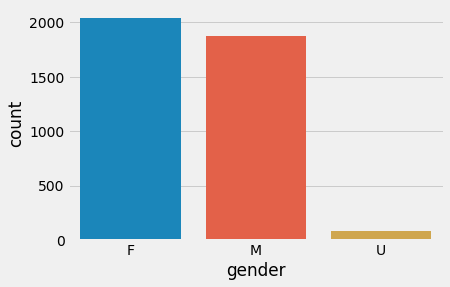

In [31]:
sns.countplot(df['gender'])


In [32]:
df['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

### F    2039
### M    1873
### U      87
### Name: gender

In [33]:
now = pd.Timestamp(datetime.datetime.now())
type(now)

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
df['DOB']= pd.to_datetime(df['DOB'])
#type(df['DOB'])

In [35]:
df["age"] = ((now - df["DOB"])/365)   
df["age"]=df["age"].dt.days

In [36]:
df.head(7)

,first_name,last_name,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,tencure,age
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,66.0
2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,39.0
3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,66.0
4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7,58.0
5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8,43.0
6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13,53.0
7,Fina,Merali,F,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11,44.0


### column dob be dropped as we have calculate age and produced a column age 

In [37]:
df=df.drop(['DOB'],axis=1)

In [38]:
df.head(2)

,first_name,last_name,gender,3y_bike_purchases,JT,Category,wealth_segement,D_Indicator,owns_car,tencure,age
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11,66.0
2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,39.0


In [39]:
sorted(df['age'],reverse=True)

[176.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 64.0,
 64.0,
 64.0,
 63.0,
 63.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 59.0,
 58.0,
 58.0,
 58.0,
 58.0,
 57.0,
 57.0,
 56.0,
 56.0,
 55.0,
 54.0,
 54.0,
 54.0,
 53.0,
 53.0,
 53.0,
 53.0,
 53.0,
 52.0,
 52.0,
 51.0,
 51.0,
 50.0,
 50.0,
 50.0,
 48.0,
 48.0,
 47.0,
 46.0,
 46.0,
 46.0,
 45.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 42.0,
 42.0,
 42.0,
 42.0,
 42.0,
 42.0,
 41.0,
 41.0,
 41.0,
 40.0,
 39.0,
 39.0,
 39.0,
 39.0,
 39.0,
 38.0,
 38.0,
 37.0,
 37.0,
 35.0,
 35.0,
 35.0,
 34.0,
 33.0,
 31.0,
 31.0,
 31.0,
 31.0,
 30.0,
 27.0,
 27.0,
 26.0,
 25.0,
 25.0,
 25.0,
 23.0,
 20.0,
 19.0,
 19.0,
 18.0,
 nan,
 62.0,
 55.0,
 55.0,
 52.0,
 52.0,
 51.0,
 47.0,
 46.0,
 45.0,
 45.0,
 45.0,
 44.0,
 44.0,
 43.0,
 42.0,
 42.0,
 42.0,
 41.0,
 41.0,
 41.0,
 40.0,
 40.0,
 39.0,
 39.0,
 38.0,
 38.0,
 38.0,
 36.0,
 35.0,
 35.0,
 34.0,
 34.0,

### if we see the maximum age in the data,it is reprsented as 176 which is not possible so we will drop it 

In [40]:
type(df[df['age']==176])


pandas.core.frame.DataFrame

In [41]:
df=df.drop(df[df['age']==176].index)

In [42]:
df.head()

,first_name,last_name,gender,3y_bike_purchases,JT,Category,wealth_segement,D_Indicator,owns_car,tencure,age
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11,66.0
2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,39.0
3,Arlin,Dearle,M,61,Recruiting Manager,Property,Mass Customer,N,Yes,15,66.0
4,Talbot,NaN,M,33,NaN,IT,Mass Customer,N,No,7,58.0
5,Sheila-kathryn,Calton,F,56,Senior Editor,NaN,Affluent Customer,N,Yes,8,43.0


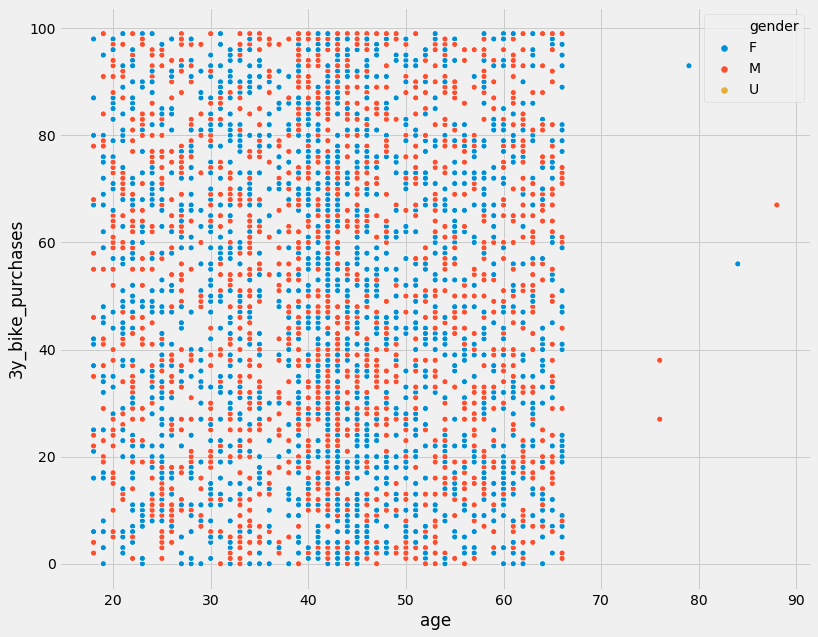

In [43]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['age'],y=df['3y_bike_purchases'],hue=df['gender'])

### from above visual we have following insights
### 1. 3y_bike_purchases are uniform for male and female ages btw 18-67(approx)
### 2. after age>70 very very few people are there who purchase bikes,probably bcoz of old age

In [44]:
df1=df.copy()

In [45]:
df1.head(6)

,first_name,last_name,gender,3y_bike_purchases,JT,Category,wealth_segement,D_Indicator,owns_car,tencure,age
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11,66.0
2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,39.0
3,Arlin,Dearle,M,61,Recruiting Manager,Property,Mass Customer,N,Yes,15,66.0
4,Talbot,NaN,M,33,NaN,IT,Mass Customer,N,No,7,58.0
5,Sheila-kathryn,Calton,F,56,Senior Editor,NaN,Affluent Customer,N,Yes,8,43.0
6,Curr,Duckhouse,M,35,NaN,Retail,High Net Worth,N,Yes,13,53.0


In [46]:
bike = [0,0,0]


In [47]:
bike[0] += df['3y_bike_purchases'][df['gender'] == 'F'].sum() 
bike[1] += df['3y_bike_purchases'][df['gender'] == 'M'].sum() 
bike[2] += df['3y_bike_purchases'][df['gender'] == 'U'].sum()


In [48]:
 df['3y_bike_purchases'][df['gender']=='F']

customer_id
1       93
5       56
7        6
9       97
10      49
        ..
3988    97
3993     6
3994     5
3996     8
3997    87
Name: 3y_bike_purchases, Length: 2039, dtype: object

In [49]:
bike

[98359, 93483, 3659]

In [50]:
s_val=df['3y_bike_purchases'].sum()

In [51]:
avg=[0,0,0]
for i in range(len(avg)):
    avg[i] += round(bike[i]/s_val,3)

In [52]:
for i in range(len(avg)):
    avg[i]=avg[i]*100
avg

[50.3, 47.8, 1.9]

In [53]:
x1 = np.arange(0,3)
x1

array([0, 1, 2])

([<matplotlib.axis.XTick at 0xc62f5c8>,
 <a list of 3 Text xticklabel objects>)

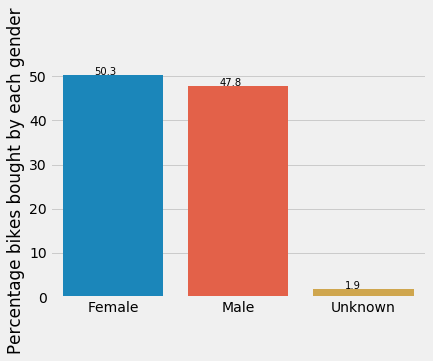

In [54]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by each gender')
sns.barplot(x1, avg)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [55]:
df.head(4)

,first_name,last_name,gender,3y_bike_purchases,JT,Category,wealth_segement,D_Indicator,owns_car,tencure,age
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11,66.0
2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,39.0
3,Arlin,Dearle,M,61,Recruiting Manager,Property,Mass Customer,N,Yes,15,66.0
4,Talbot,NaN,M,33,NaN,IT,Mass Customer,N,No,7,58.0


In [56]:
df['age']=df['age'].fillna(0)

In [57]:
df['age']=df['age'].astype('int')

In [58]:
female=df[df['gender']=='F']
male=df[df['gender']=='M']


Text(0.5, 1.0, 'FEMALE AGE')

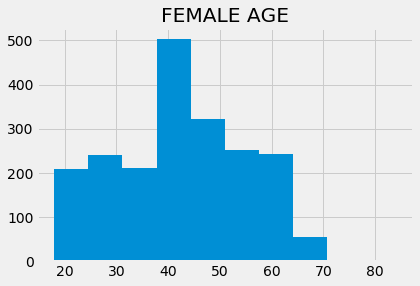

In [224]:
female.hist()
plt.title('FEMALE AGE')

In [60]:
female.describe()

,age
count,2039.000000
mean,42.451692
std,12.504346
min,18.000000
25%,33.000000
50%,43.000000
75%,52.000000
max,84.000000


Text(0.5, 1.0, 'MALE AGE')

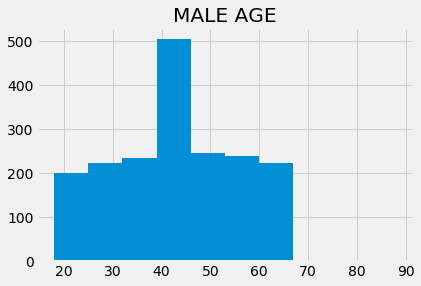

In [225]:
male.hist()
plt.title('MALE AGE')

In [62]:
male.describe()

,age
count,1873.000000
mean,42.310198
std,12.769839
min,18.000000
25%,33.000000
50%,42.000000
75%,52.000000
max,88.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

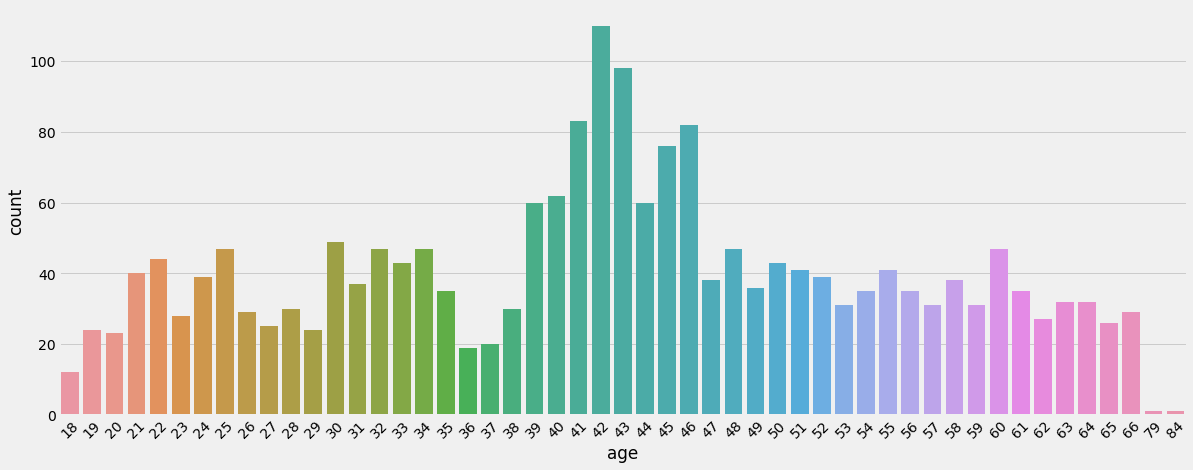

In [63]:
plt.figure(figsize=(18,7))
sns.countplot(female['age'])
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

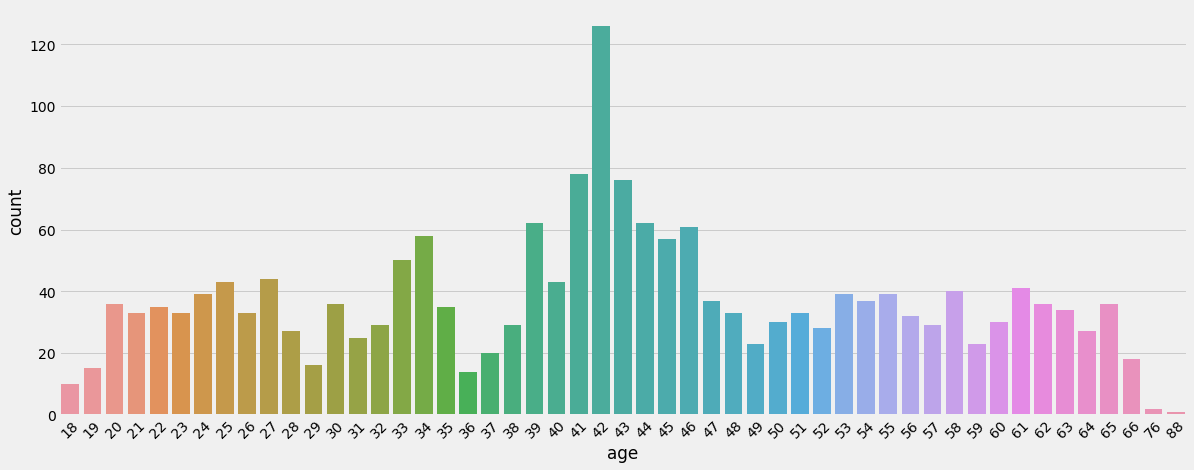

In [64]:
plt.figure(figsize=(18,7))
sns.countplot(male['age'])
plt.xticks(rotation=45)


In [65]:
df["Category"].value_counts()


Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    222
Entertainment         136
Argiculture           113
Telecommunications     72
Name: Category, dtype: int64

In [66]:
s=pd.DataFrame(df["Category"].value_counts())
s=s.reset_index()
s.columns=['category','count']
s

,category,count
0,Manufacturing,799
1,Financial Services,774
2,Health,602
3,Retail,358
4,Property,267
5,IT,222
6,Entertainment,136
7,Argiculture,113
8,Telecommunications,72


In [67]:
val1=list(s['count'])

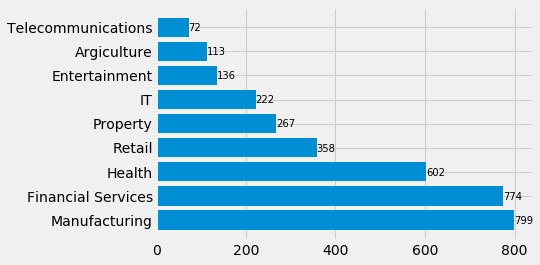

In [68]:
#x=np.arange(50,900)

plt.barh(s['category'],s['count'])

for i in range(len(val1)):
    plt.text(x = val1[i], y = i-0.15, s = val1[i], size = 10)



In [69]:
df["wealth_segement"].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     978
Name: wealth_segement, dtype: int64

In [70]:
a=pd.DataFrame(df["wealth_segement"].value_counts())
a=a.reset_index()
a.columns=['wealth_segement','count']
a

,wealth_segement,count
0,Mass Customer,2000
1,High Net Worth,1021
2,Affluent Customer,978


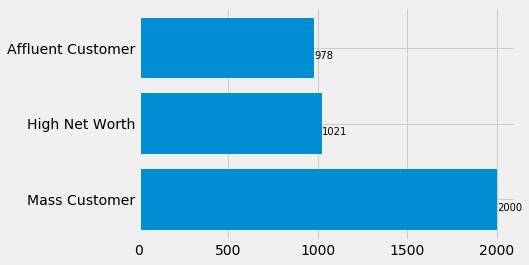

In [71]:
val=list(a['count'])
plt.barh(a['wealth_segement'],a['count'])
for i in range(len(val)):
    plt.text(x = val[i], y = i-0.15, s = val[i], size = 10)



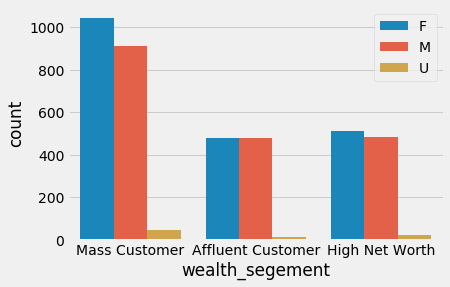

In [199]:
sns.countplot(df['wealth_segement'],hue=df['gender'])
plt.legend(loc='upper right')

In [72]:
df["owns_car"].value_counts()

Yes    2024
No     1975
Name: owns_car, dtype: int64

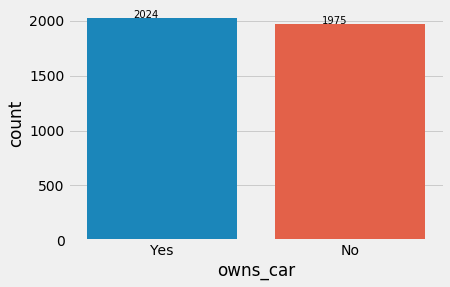

In [73]:
#----------------------
d=pd.DataFrame(df["owns_car"].value_counts())
d=d.reset_index()
d.columns=['owns_car','count']
val2=list(d['count'])


#----------------------------
sns.countplot(df["owns_car"])
#-----------------------------
for i in range(len(val2)):
    plt.text(x =i-0.15 , y = val2[i], s = val2[i], size = 10)


# READING SHEET NewCustomerList

In [74]:
data=pd.read_excel(xls,'NewCustomerList')

In [75]:
data.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312


In [76]:
data.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"fname"}, inplace = True)
data.rename(columns={"Unnamed: 1":"lname",
                   "Unnamed: 2":"gender",
                   "Unnamed: 3":"3y_bike_purchases",
                   "Unnamed: 4":"DOB",
                   "Unnamed: 5":"JT",
                   "Unnamed: 6":"Category"}, inplace = True)
data.rename(columns={"Unnamed: 7":"wealth_segement",
                   "Unnamed: 8":"D_Indicator",
                   "Unnamed: 9":"owns_car",
                   "Unnamed: 10":"tencure",
                   "Unnamed: 11":"address",
                   "Unnamed: 12":"postcode"}, inplace = True)
data.rename(columns={"Unnamed: 13":"state",
                   "Unnamed: 14":"country",
                   "Unnamed: 15":"prop_val",
                   "Unnamed: 21":"rank",
                   "Unnamed: 22":"value"}, inplace = True)

data

,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,...,state,country,prop_val,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,rank,value
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4.0,4,1.70312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997.0,997,0.357


In [77]:
data=data[1:]
data.head()

,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,...,state,country,prop_val,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,rank,value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.70312


In [78]:
data.columns

Index(['fname', 'lname', 'gender', '3y_bike_purchases', 'DOB', 'JT',
       'Category', 'wealth_segement', 'D_Indicator', 'owns_car', 'tencure',
       'address', 'postcode', 'state', 'country', 'prop_val', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'rank',
       'value'],
      dtype='object')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fname              1000 non-null   object 
 1   lname              971 non-null    object 
 2   gender             1000 non-null   object 
 3   3y_bike_purchases  1000 non-null   object 
 4   DOB                983 non-null    object 
 5   JT                 894 non-null    object 
 6   Category           835 non-null    object 
 7   wealth_segement    1000 non-null   object 
 8   D_Indicator        1000 non-null   object 
 9   owns_car           1000 non-null   object 
 10  tencure            1000 non-null   object 
 11  address            1000 non-null   object 
 12  postcode           1000 non-null   object 
 13  state              1000 non-null   object 
 14  country            1000 non-null   object 
 15  prop_val           1000 non-null   object 
 16  Unnamed: 16        1000 

In [80]:
data['3y_bike_purchases']=data['3y_bike_purchases'].astype('int')
data

,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,...,state,country,prop_val,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,rank,value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4.0,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4.0,4,1.70312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997.0,997,0.357


In [81]:
data.isna().sum()

fname                  0
lname                 29
gender                 0
3y_bike_purchases      0
DOB                   17
JT                   106
Category             165
wealth_segement        0
D_Indicator            0
owns_car               0
tencure                0
address                0
postcode               0
state                  0
country                0
prop_val               0
Unnamed: 16            0
Unnamed: 17            0
Unnamed: 18            0
Unnamed: 19            0
Unnamed: 20            0
rank                   0
value                  0
dtype: int64

In [82]:
cols=data.columns
cols=list(cols)


In [83]:
for i in cols:
    print(i)
    print('-----------')
    print(data[i].unique())
    
    print('-----------')

fname
-----------
['Chickie' 'Morly' 'Ardelis' 'Lucine' 'Melinda' 'Druci' 'Rutledge'
 'Nancie' 'Duff' 'Barthel' 'Rockwell' 'Wheeler' 'Olag' 'Melba' 'Mandie'
 'Dukie' 'Marcelia' 'Winnifred' 'Odilia' 'Karly' 'Teddie' 'Gaston' 'Otis'
 'Tabbatha' 'Brena' 'Rourke' 'Dyane' 'Claudine' 'Blinnie' 'Rhona'
 'Sharron' 'Brien' 'Sybilla' 'Mikel' 'Maisie' 'Arleen' 'Farlie' 'Mitchell'
 'Garik' 'Antonin' 'Vinny' 'Colene' 'Neile' 'Corinna' 'Brooke' 'Gipsy'
 'Sheena' 'Jobina' 'Gale' 'Thaxter' 'Heinrick' 'Taylor' 'Griswold'
 'Odessa' 'Lavena' 'Martelle' 'Briant' 'Marylou' 'Whittaker' 'Normy'
 'Lorrie' 'Jedediah' 'Kaine' 'Loise' 'Cristen' 'Dorothy' 'Rosmunda'
 'Rozamond' 'Gunner' 'Vivienne' 'Sherilyn' 'Bessie' 'Kevina' 'Yancy'
 'Mabelle' 'Hasheem' 'Tobias' 'Glennis' 'Chanda' 'Katheryn' 'Sumner'
 'Valerie' 'Esther' 'Gardie' 'Sean' 'Pietra' 'Marysa' 'Kahaleel' 'Ossie'
 'Sid' 'Ludovico' 'Patricia' 'Andromache' 'Levy' 'Nobe' 'Jehu' 'Symon'
 'Karlik' 'Bengt' 'Evangelin' 'Hanny' 'Gina' 'Reynold' 'Flossy' 'Griffi

### all values in D_indicaor are N

In [84]:
#creating age column
now = pd.Timestamp(datetime.datetime.now())
type(now)

pandas._libs.tslibs.timestamps.Timestamp

In [85]:

data['DOB']= pd.to_datetime(data['DOB'])
#type(df['DOB'])


In [86]:
data["age"] = ((now - data["DOB"])/365)   
data["age"]=data["age"].dt.days

In [87]:
data=data.drop(['DOB'],axis=1)

In [88]:
data.head()

,fname,lname,gender,3y_bike_purchases,JT,Category,wealth_segement,D_Indicator,owns_car,tencure,...,country,prop_val,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,rank,value,age
1,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875,62.0
2,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,...,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875,50.0
3,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875,45.0
4,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312,41.0
5,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.70312,54.0


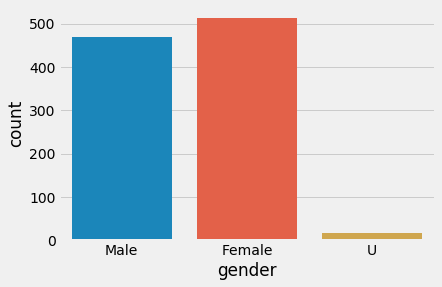

In [89]:
sns.countplot(data['gender'])


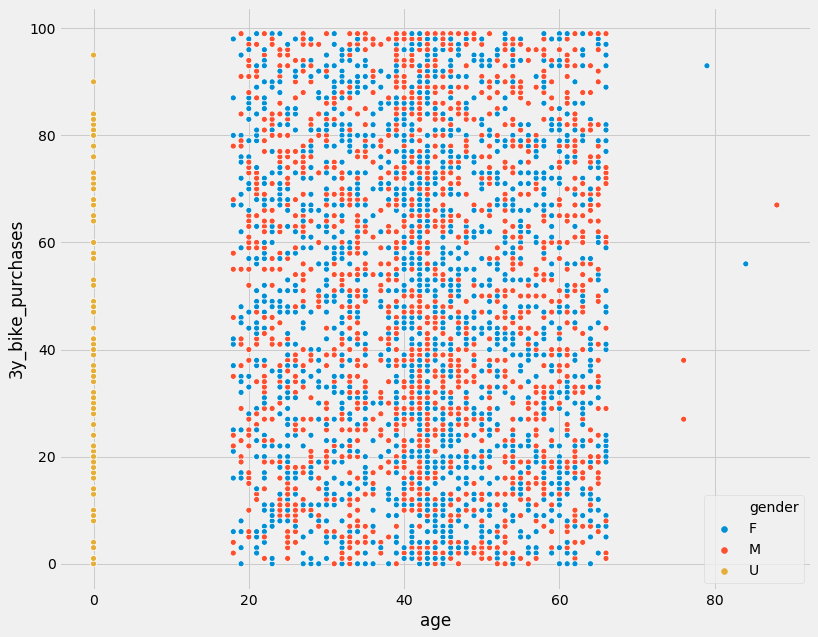

In [90]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['age'],y=df['3y_bike_purchases'],hue=df['gender'])

In [91]:
bikes = [0,0,0]

In [92]:

bikes[0] += data['3y_bike_purchases'][data['gender'] == 'Female'].sum() 
bikes[1] += data['3y_bike_purchases'][data['gender'] == 'Male'].sum() 
bikes[2] += data['3y_bike_purchases'][data['gender'] == 'U'].sum()
bikes


[25212, 23765, 859]

In [93]:
t_val=data['3y_bike_purchases'].sum()


In [94]:
avg1=[0,0,0]
for i in range(len(avg1)):
    avg1[i] += round(bikes[i]/t_val,3)
for i in range(len(avg1)):
    avg1[i]=avg1[i]*100
avg1


[50.6, 47.699999999999996, 1.7000000000000002]

([<matplotlib.axis.XTick at 0xf029508>,
 <a list of 3 Text xticklabel objects>)

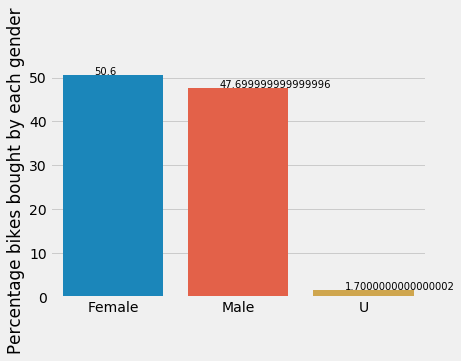

In [95]:

x1 = np.arange(0,3)
x1
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by each gender')
sns.barplot(x1, avg1)
for i in range(len(avg1)):
    plt.text(x = i-0.15, y = avg1[i], s = avg1[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'U'))


In [96]:
data['age']=data['age'].fillna(0)
data['age']=data['age'].astype('int')


In [97]:
female1=data[data['gender']=='Female']
male1=data[data['gender']=='Male']


Text(0.5, 1.0, 'female')

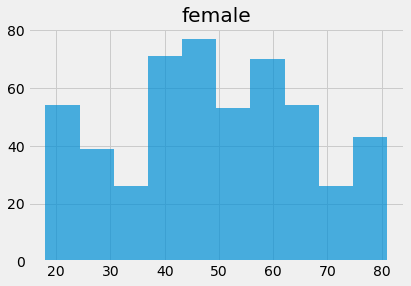

In [98]:
female1['age'].hist(alpha=0.7)
plt.title('female')

Text(0.5, 1.0, 'male')

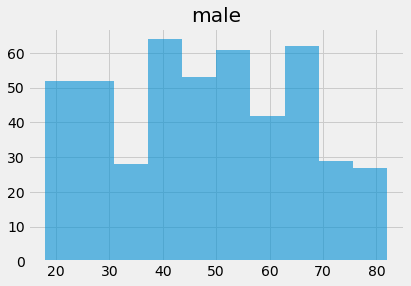

In [99]:
male1['age'].hist(alpha=0.6)
plt.title('male')

Text(0.5, 1.0, 'male')

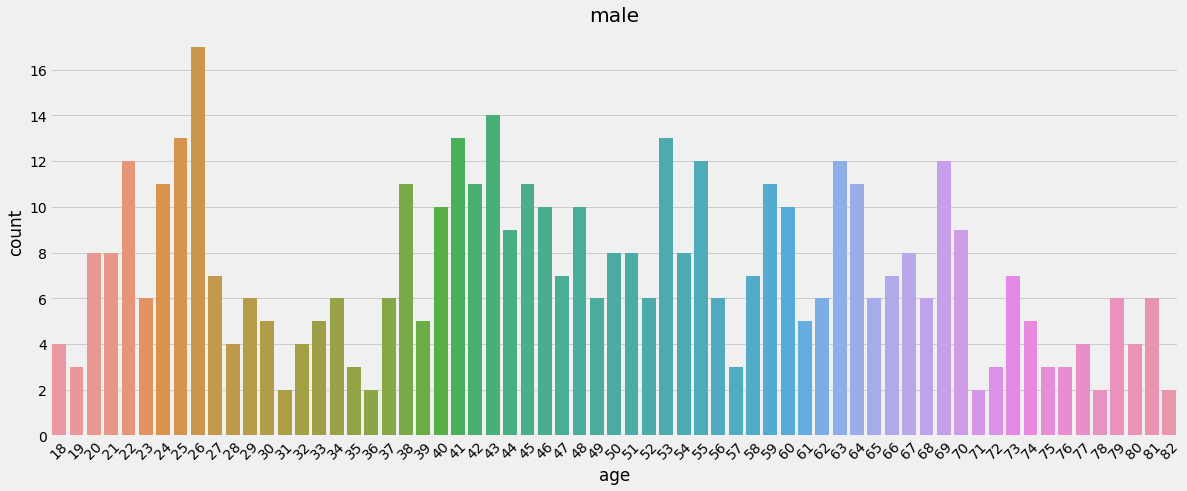

In [100]:
plt.figure(figsize=(18,7))
sns.countplot(male1['age'])
plt.xticks(rotation=45)

plt.title('male')

Text(0.5, 1.0, 'female')

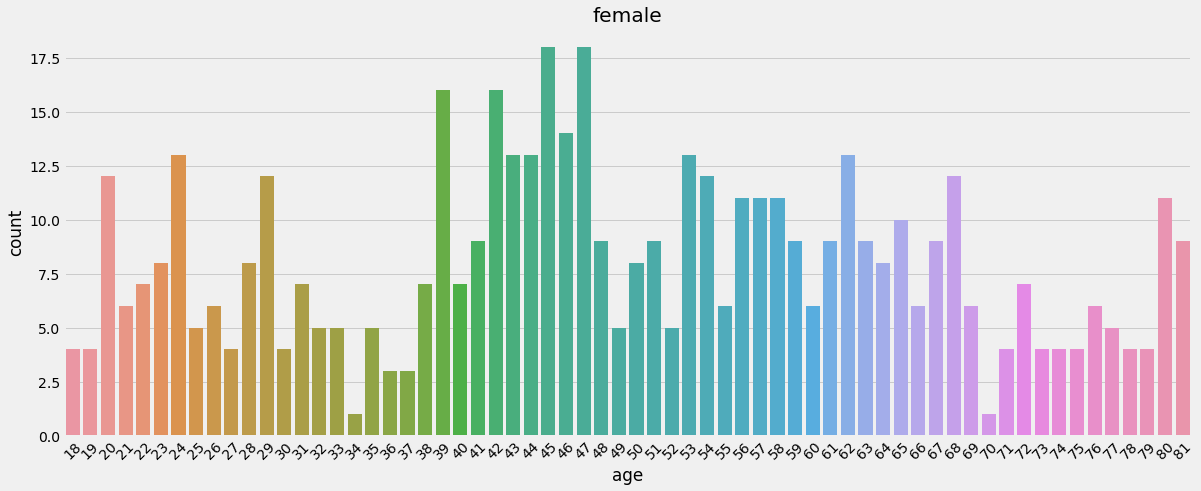

In [101]:

plt.figure(figsize=(18,7))
sns.countplot(female1['age'])
plt.xticks(rotation=45)

plt.title('female')


In [102]:
data["Category"].value_counts()
s1=pd.DataFrame(data["Category"].value_counts())


In [103]:
s1=s1.reset_index()
s1.columns=['category','count']
s1


,category,count
0,Financial Services,203
1,Manufacturing,199
2,Health,152
3,Retail,78
4,Property,64
5,IT,51
6,Entertainment,37
7,Argiculture,26
8,Telecommunications,25


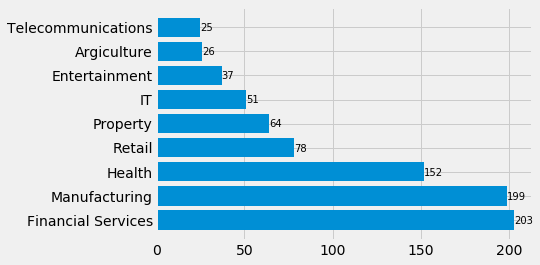

In [104]:

val11=list(s1['count'])
#x=np.arange(50,900)

plt.barh(s1['category'],s1['count'])

for i in range(len(val11)):
    plt.text(x = val11[i], y = i-0.15, s = val11[i], size = 10)


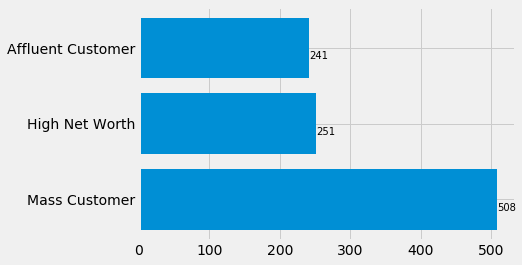

In [105]:
data["wealth_segement"].value_counts()
a1=pd.DataFrame(data["wealth_segement"].value_counts())
a1=a1.reset_index()
a1.columns=['wealth_segement','count']
a1
val2=list(a1['count'])
plt.barh(a1['wealth_segement'],a1['count'])
for i in range(len(val2)):
    plt.text(x = val2[i], y = i-0.15, s = val2[i], size = 10)



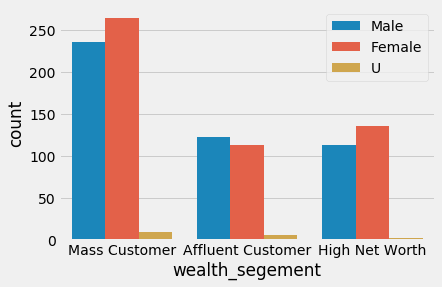

In [200]:
sns.countplot(data['wealth_segement'],hue=data['gender'])
plt.legend(loc='upper right')

In [106]:
w=data['state'].value_counts()

In [107]:
ss=pd.DataFrame(w)
ss=ss.reset_index()
ss.columns=['state','count']
ss

,state,count
0,NSW,506
1,VIC,266
2,QLD,228


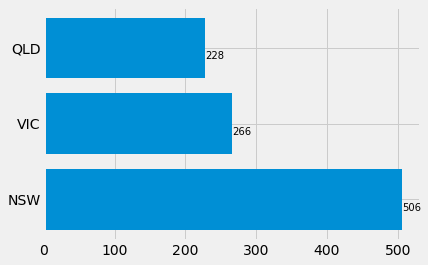

In [108]:
vals=list(ss['count'])
plt.barh(ss['state'],ss['count'])
for i in range(len(vals)):
    plt.text(x = vals[i], y = i-0.15, s = vals[i], size = 10)


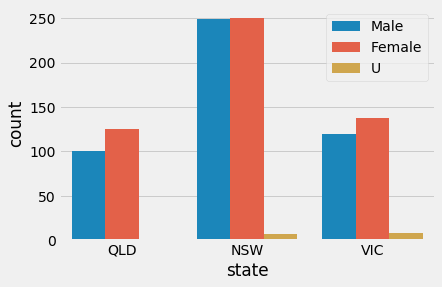

In [201]:
sns.countplot(data['state'],hue=data['gender'])
plt.legend(loc='upper right')

# reaing sheet Transactions

In [132]:
dff=pd.read_excel(xls,'Transactions')

In [133]:
dff.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [134]:
dff['Unnamed: 12']

0        product_first_sold_date
1                          41245
2                          41701
3                          36361
4                          36145
                  ...           
19996                      37823
19997                      35560
19998                      40410
19999                      38216
20000                      36334
Name: Unnamed: 12, Length: 20001, dtype: object

In [135]:
dff.columns

Index(['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [136]:
dff[0:1]

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [137]:

dff.columns=['transaction_id','product_id','customer_id','transaction_date','online_order','order_status','brand','product_line','product_class','product_size','list_price','standard_cost','product_first_sold_date']

In [138]:
dff.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [142]:
dff=dff[1:]
dff.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [143]:
dff['product_first_sold_date'].unique()

array([41245, 41701, 36361, 36145, 42226, 39031, 34165, 39915, 33455,
       38216, 40784, 42172, 34527, 34586, 38193, 37873, 38206, 33888,
       37337, 36334, 42145, 42404, 34079, 41047, 42560, 42710, 41922,
       37539, 42688, 38991, 38647, 37874, 34996, 33549, 38693, 37668,
       41533, 41009, 40553, 39427, 38482, 35470, 41434, 36367, 38750,
       41848, 34244, 42696, 38258, 41167, 40672, 35707, 42295, 33552,
       35667, 33879, 40670, 37626, 38339, 40303, 34143, 35160, 36668,
       36498, 34071, 40649, 37823, 36146, 42105, 34115, 35052, 33364,
       42218, 41345, 33429, 38859, nan, 36833, 37499, 41064, 33259, 35560,
       37838, 37698, 35378, 38573, 38002, 39526, 39880, 40487, 40336,
       40618, 34170, 40410, 42458, 39298, 35455, 37220, 37659, 40779,
       34556], dtype=object)

### product_first_sold_date values are not clear need much detail on it

In [144]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [145]:
dff.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

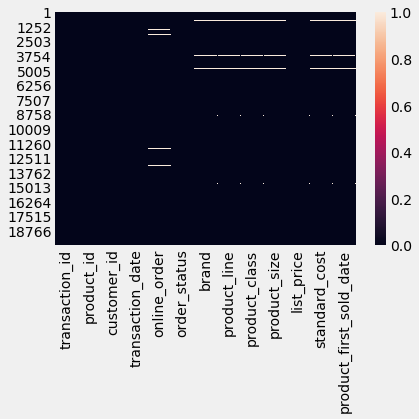

In [146]:
sns.heatmap(dff.isna())

In [147]:
dff['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [148]:
dff['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [178]:
b=[19821,179]

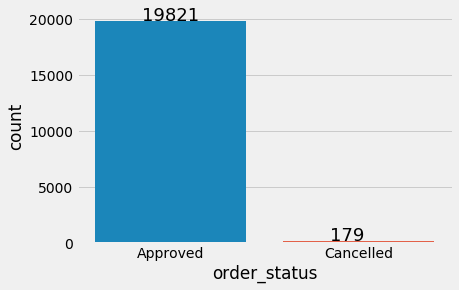

In [179]:
sns.countplot(dff['order_status'])
for i in range(len(b)):
    plt.text(x=i-0.15,y=b[i],s=b[i],size=18)


In [159]:
dff['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [160]:
dff['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [164]:
q=pd.DataFrame(dff["brand"].value_counts())
q=q.reset_index()
q.columns=['brand','count']
q

,brand,count
0,Solex,4253
1,Giant Bicycles,3312
2,WeareA2B,3295
3,OHM Cycles,3043
4,Trek Bicycles,2990
5,Norco Bicycles,2910


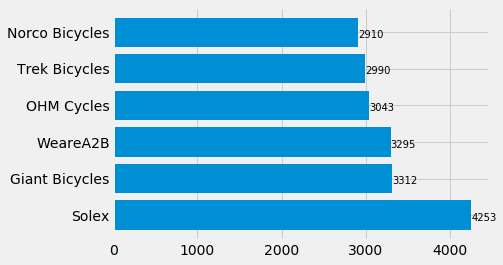

In [165]:
res=list(q['count'])
plt.barh(q['brand'],q['count'])

for i in range(len(res)):
    plt.text(x = res[i], y = i-0.15, s = res[i], size = 10)


In [166]:
dff.head(7)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
6,6,25,2339,2017-03-08 00:00:00,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031
7,7,22,1542,2017-04-21 00:00:00,True,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165


In [167]:
#lets check if online ordering records to see if online reach of the company is satisfying

In [168]:
dff['online_order'].unique()

array([False, True, nan], dtype=object)

In [169]:
dff['online_order'].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [174]:
v=[9829,9811]

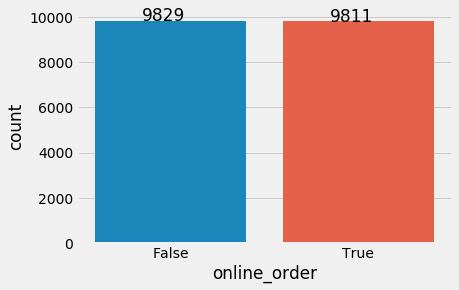

In [176]:
sns.countplot(dff['online_order'])
for i in range(len(v)):
    plt.text(x = i-0.15, y = v[i], s = v[i], size = 17)


In [181]:
dff['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring', nan], dtype=object)

In [183]:
dff['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [188]:
e=pd.DataFrame(dff["product_line"].value_counts())
e=e.reset_index()
e.columns=['product_line','count']
e

,product_line,count
0,Standard,14176
1,Road,3970
2,Touring,1234
3,Mountain,423


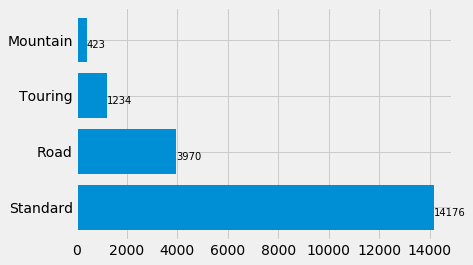

In [189]:
res1=list(e['count'])
plt.barh(e['product_line'],e['count'])

for i in range(len(res1)):
    plt.text(x = res1[i], y = i-0.15, s = res1[i], size = 10)


In [190]:
dff['product_class'].unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [191]:
dff['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

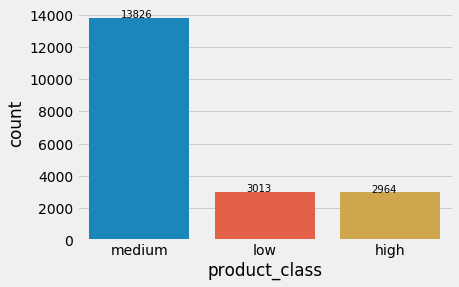

In [192]:
d=[13826,3013,2964]
sns.countplot(dff['product_class'])
for i in range(len(d)):
    plt.text(x=i-0.15,y=d[i],s=d[i],size=10)

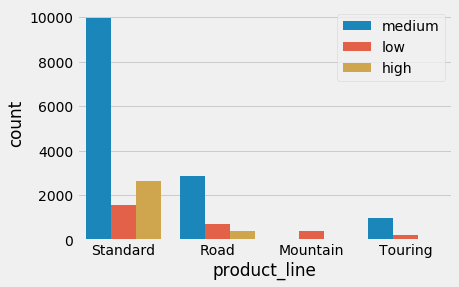

In [196]:
sns.countplot(dff['product_line'],hue=dff['product_class'])
plt.legend(loc='upper right')

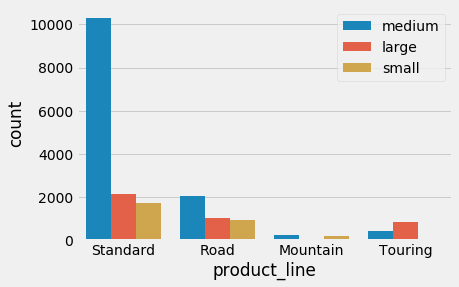

In [197]:
sns.countplot(dff['product_line'],hue=dff['product_size'])
plt.legend(loc='upper right')

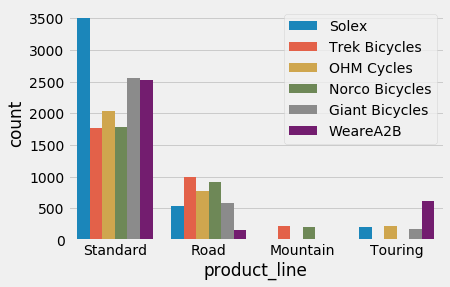

In [198]:
sns.countplot(dff['product_line'],hue=dff['brand'])
plt.legend(loc='upper right')

# reading sheet CustomerAddress

In [203]:
dfa=pd.read_excel(xls,'CustomerAddress')

In [204]:
dfa.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [212]:
dfa.iloc[0:1]

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation


In [213]:
dfa.columns=['customer_id','address','postcode','state','country','property_valuation']

In [214]:
dfa.head()

,customer_id,address,postcode,state,country,property_valuation
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [215]:
dfa=dfa[1:]

In [216]:
dfa.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [217]:
dfa.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [218]:
dfa['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [220]:
e1=pd.DataFrame(dfa["state"].value_counts())
e1=e1.reset_index()
e1.columns=['state','count']
e1

,state,count
0,NSW,2054
1,VIC,939
2,QLD,838
3,New South Wales,86
4,Victoria,82


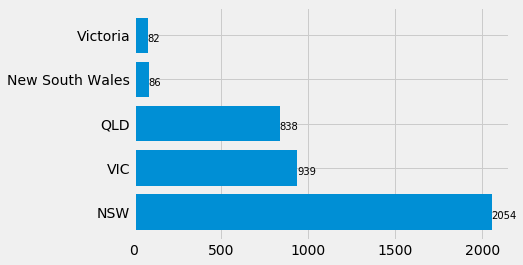

In [222]:

val112=list(e1['count'])

plt.barh(e1['state'],e1['count'])

for i in range(len(val112)):
    plt.text(x = val112[i], y = i-0.15, s = val112[i], size = 10)
